In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

file_path = "tmdb_5000_movies.csv"
df = pd.read_csv(file_path)
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [3]:
df.drop(['genres','homepage','id','keywords','original_language','original_title','overview','production_companies','production_countries','spoken_languages','status','tagline'], axis=1, inplace=True)

In [4]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [5]:
df.dtypes

budget                   int64
popularity             float64
release_date    datetime64[ns]
revenue                  int64
runtime                float64
title                   object
vote_average           float64
vote_count               int64
dtype: object

In [6]:
df['release_date_year'] = df['release_date'].dt.year

In [7]:
df['release_date_year']

0       2009.0
1       2007.0
2       2015.0
3       2012.0
4       2012.0
         ...  
4798    1992.0
4799    2011.0
4800    2013.0
4801    2012.0
4802    2005.0
Name: release_date_year, Length: 4803, dtype: float64

In [8]:
df[df['release_date_year'].isnull() == True]

,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,release_date_year
4553,0,0.0,NaT,0,0.0,America Is Still the Place,0.0,0,NaN


In [9]:
df.drop(4553, inplace=True)
df[df['release_date_year'].isnull() == True]

,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,release_date_year


In [10]:
df['release_date_year'] = df['release_date_year'].astype('int64')

In [11]:
df.head(1)

,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,release_date_year
0,237000000,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,2009


In [12]:
df.sort_values(by=['budget'], ascending=False, axis=0)[['release_date_year','title','budget','revenue','vote_average','vote_count','popularity']].head(3)

,release_date_year,title,budget,revenue,vote_average,vote_count,popularity
17,2011,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802,6.4,4948,135.413856
1,2007,Pirates of the Caribbean: At World's End,300000000,961000000,6.9,4500,139.082615
7,2015,Avengers: Age of Ultron,280000000,1405403694,7.3,6767,134.279229


In [14]:
# vote_count number is too small.
df.sort_values(by=['vote_average'], ascending=False, axis=0)[['release_date_year','title','budget','revenue','vote_average','vote_count','popularity']].head(3)

,release_date_year,title,budget,revenue,vote_average,vote_count,popularity
3519,1998,Stiff Upper Lips,0,0,10.0,1,0.356495
4247,2015,Me You and Five Bucks,1,0,10.0,2,0.094105
4045,1998,"Dancer, Texas Pop. 81",0,565592,10.0,1,0.376662


In [15]:
vote_mean = df['vote_count'].mean()
vote_mean

690.3617242815493

In [16]:
reduced_df = df[df['vote_count'] >= vote_mean].sort_values(by=['vote_average'], ascending=False, axis=0)
reduced_df.head(3)

,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,release_date_year
1881,25000000,136.747729,1994-09-23,28341469,142.0,The Shawshank Redemption,8.5,8205,1994
3337,6000000,143.659698,1972-03-14,245066411,175.0,The Godfather,8.4,5893,1972
662,63000000,146.757391,1999-10-15,100853753,139.0,Fight Club,8.3,9413,1999


In [18]:
reduced_df['release_date'].max() 

Timestamp('2016-08-02 00:00:00')

In [21]:
# release_date year will be segmented into 10 years interval.
bins = [1936, 1946, 1956, 1966, 1976, 1986, 1996, 2006, 2016]
labels = ['1936~1946','1947~1956','1957~1966','1967~1976','1977~1986','1987~1996','1997~2006','2007~2016']

In [22]:
df_year_group = pd.cut(reduced_df['release_date_year'], bins, labels)
reduced_df["release_date_group"] = df_year_group
reduced_df.head(2)

,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,release_date_year,release_date_group
1881,25000000,136.747729,1994-09-23,28341469,142.0,The Shawshank Redemption,8.5,8205,1994,"(1986, 1996]"
3337,6000000,143.659698,1972-03-14,245066411,175.0,The Godfather,8.4,5893,1972,"(1966, 1976]"


In [24]:
reduced_df['vote_average'].min() 

4.1

In [23]:
reduced_df['vote_average'].max() 

8.5

In [25]:
bins = [4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5]
labels = ['e4','l4','e5','l5','e6','l6','e7', 'l7','e8']
df_vote_group = pd.cut(reduced_df['vote_average'], bins, labels)
reduced_df['vote_average_group'] = df_vote_group
reduced_df.head(2)

,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,release_date_year,release_date_group,vote_average_group
1881,25000000,136.747729,1994-09-23,28341469,142.0,The Shawshank Redemption,8.5,8205,1994,"(1986, 1996]","(8.0, 8.5]"
3337,6000000,143.659698,1972-03-14,245066411,175.0,The Godfather,8.4,5893,1972,"(1966, 1976]","(8.0, 8.5]"


In [26]:
reduced_df.groupby(["release_date_group"])['vote_average'].mean()

release_date_group
(1936, 1946]    7.350000
(1946, 1956]    8.000000
(1956, 1966]    7.653846
(1966, 1976]    7.830769
(1976, 1986]    7.381250
(1986, 1996]    7.071287
(1996, 2006]    6.742706
(2006, 2016]    6.498588
Name: vote_average, dtype: float64

# Data Cleaning

In [27]:
reduced_df.isnull().sum()

budget                0
popularity            0
release_date          0
revenue               0
runtime               0
title                 0
vote_average          0
vote_count            0
release_date_year     0
release_date_group    1
vote_average_group    0
dtype: int64

In [28]:
reduced_df[reduced_df['release_date_group'].isnull() == True]

,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,release_date_year,release_date_group,vote_average_group
4238,1,28.27648,1936-02-05,8500000,87.0,Modern Times,8.1,856,1936,NaN,"(8.0, 8.5]"


In [32]:
reduced_df.drop(4238, inplace=True)

In [33]:
reduced_df.isnull().sum()

budget                0
popularity            0
release_date          0
revenue               0
runtime               0
title                 0
vote_average          0
vote_count            0
release_date_year     0
release_date_group    0
vote_average_group    0
dtype: int64

In [34]:
reduced_df.dtypes

budget                         int64
popularity                   float64
release_date          datetime64[ns]
revenue                        int64
runtime                      float64
title                         object
vote_average                 float64
vote_count                     int64
release_date_year              int64
release_date_group          category
vote_average_group          category
dtype: object

<AxesSubplot:xlabel='release_date_group', ylabel='vote_count'>

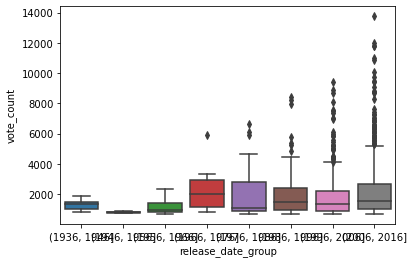

In [35]:
sns.boxplot(x="release_date_group", y="vote_count", data=reduced_df)

In [36]:
reduced_df[reduced_df.duplicated('title') == True]

,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,release_date_year,release_date_group,vote_average_group


# Data visualization

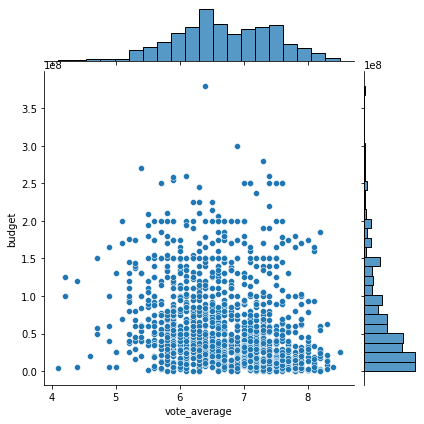

In [37]:
sns.jointplot(x="vote_average", y="budget", data=reduced_df)

In [39]:
# The higher vote rate is less budgeted than the average vote.

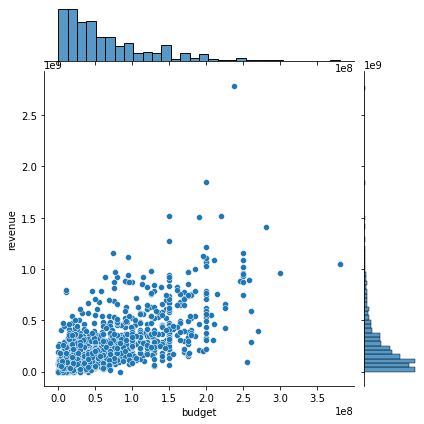

In [38]:
sns.jointplot(x="budget", y="revenue", data=reduced_df)

In [40]:
# The revenue increases with the higher budget. 

In [41]:
pvt = reduced_df.pivot_table(index="release_date_group", columns="vote_average_group", aggfunc="size")

<AxesSubplot:xlabel='vote_average_group', ylabel='release_date_group'>

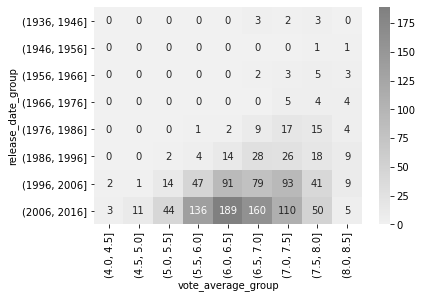

In [42]:
sns.heatmap(pvt, cmap=sns.light_palette("gray", as_cmap=True), annot=True, fmt="d")

In [43]:
# In recent years,there are more votes but the vote average is reduced.

<AxesSubplot:xlabel='release_date'>

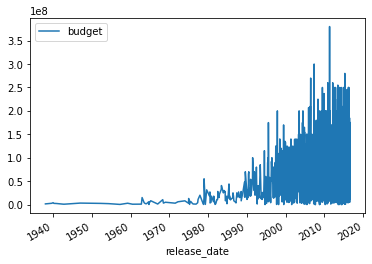

In [44]:
reduced_df.plot(x='release_date', y='budget')

In [45]:
# In recent years, the budget in movie industry was increased significantly.